<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Natalia Abarca G.
- Nombre de alumno 2: César Véliz R.


### **Link de repositorio de GitHub:** `https://github.com/CVelizR/evaluaciones-mds7202`


## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [4]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [5]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)

#Se muestran los primeras 5 filas
display(df_retail.head())

#Columnas
print(" ")
print("Nombre columnas: "+str(list(df_retail.columns)))
print(" ")

#Tipo de variable por columna

print(df_retail.dtypes)

print(" ")
print("Invoice representa...")
print("StockCode corresponde al código de stock")
print("Description corresponde a una descripción del producto")
print("Quantity es la cantidad de stock disponible del producto en la tienda")
print("InvoiceDate corresponde a la fecha de ")
print("Price corresponde al precio por unidad de la tienda")
print("Customer ID corresponde a la ID del cliente")
print("Country corresponde al país de la tienda del producto")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


 
Nombre columnas: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']
 
Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object
 
Invoice representa...
StockCode corresponde al código de stock
Description corresponde a una descripción del producto
Quantity es la cantidad de stock disponible del producto en la tienda
InvoiceDate corresponde a la fecha de 
Price corresponde al precio por unidad de la tienda
Customer ID corresponde a la ID del cliente
Country corresponde al país de la tienda del producto


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Un análisis univariable consiste en estudiar el comportamiento de las distintas variables presentes en el dataset mediante estadísiticas de resumen y sus distribuciones. Por otro lado, un análisis multivariable se trata de estudiar el comportamiento que ejercen las variables entre sí.  Finalmente, con respecto al análisis de datos faltantes consiste en buscar inconsistencia en los datos, como lo puede ser valores nulos/nan.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [6]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [7]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Con respecto a la primera serie, tras observar los resultados obtenidos en la tabla *Price Profile* se obtuvo un valor mínimo de -53594.36, lo cual carece de sentido para esta variable debido a que no existen precios de venta negativos. Producto de esto, muchos de los estadísticos presentes en la tabla presentarán datos distorsionados y poco precisos con respecto al comportamiento real de la variable. Adicionalmente, se aprecia un valor absoluto del skew bastante alto, debido a la presencia de outliers. Esto última se nota particularmente al observar que el valor máximo corresponde a 25111.09, pero el 75% de los datos es menor o igual a 4.21.

Por otro lado, al analizar los gráficos se puede observar que al remover los outliers, los datos restantes se vuelven más representativos y el rango de datos se vuelve más acotado, por lo que se puede observar una mejor visualización de la distribución de los datos en el histograma.


In [8]:
profile_serie(df_retail["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

En la tabla Quantity Profile se puede observar que hay datos incoherentes ya que el 2,35% de los datos corresponden a valores negativos, lo que no tiene sentido para este tipo de variable. Por otro lado, también se pueden un alto valor de skew debido a la presencia de outliers, lo que también se refleja en los valores de los cuartiles, en donde se ve que el 75% de los datos es menor o igual a 10, mientras que el valor máximo que toma la variable es 19152.

En este sentido, al comparar los gráficos de la variable con y sin outliers, se observa una mejor visualización de los datos el este último ya que el rango de valores disminuye, permitiendo observar más detalladamente la distribución de los valores que la variable puede tomar con mayor certeza. 


### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [9]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

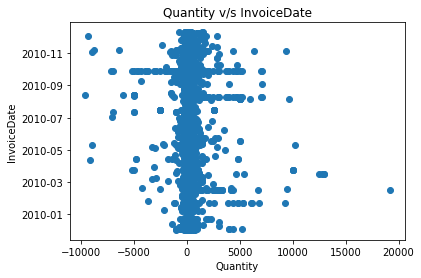

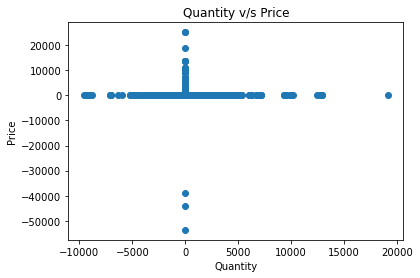

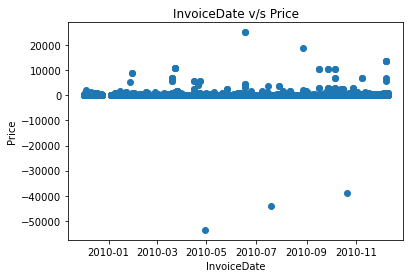

## Correlation:

## Missing Matrix:

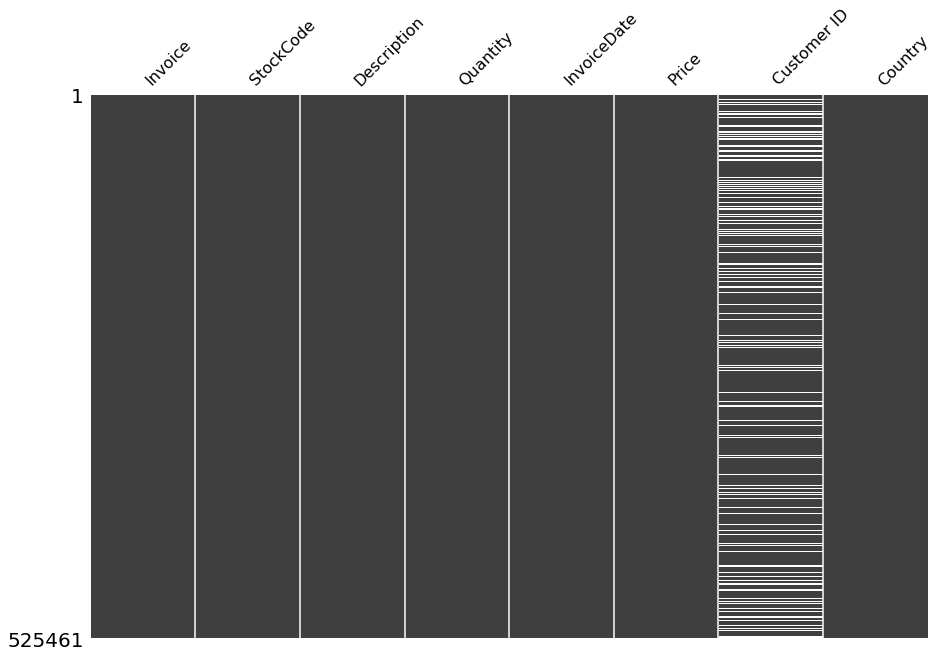

In [10]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [11]:
def clean_df(dataframe_in):
    df=dataframe_in.copy()
    list_num = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]):
            list_num.append(col)
    df.dropna(axis=0,inplace=True)
    for i in list_type:
        df=df[df[i]>=0]

    df.drop_duplicates(inplace=True)

    return df            
    

In [12]:
df_retail_clean=clean_df(df_retail)
profile_serie(df_retail_clean["Price"])

## Price Profile

Type                            float64
Number of observations         400947.0
Mean                           3.305571
Std                           35.046376
Min                                 0.0
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                31
Zeros (%)                        0.01 %
Kurt                       62823.652566
Skew                         233.151773
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400761
Duplicate rows (%)              99.95 %
Total size in memory      6415152 bytes
dtype: object

In [13]:
profile_serie(df_retail_clean["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         400947.0
Mean                          13.768523
Std                           97.639816
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9417.083923
Skew                          79.272908
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400833
Duplicate rows (%)              99.97 %
Total size in memory      6415152 bytes
dtype: object

## Bivariant Analysis:

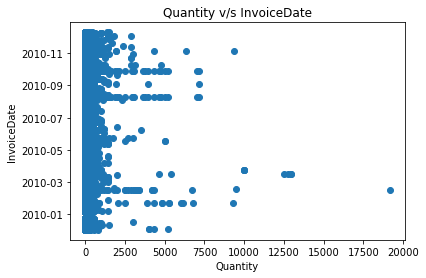

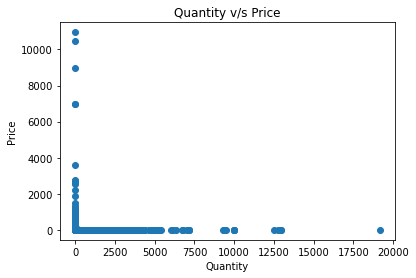

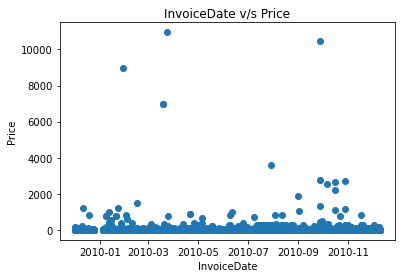

## Correlation:

## Missing Matrix:

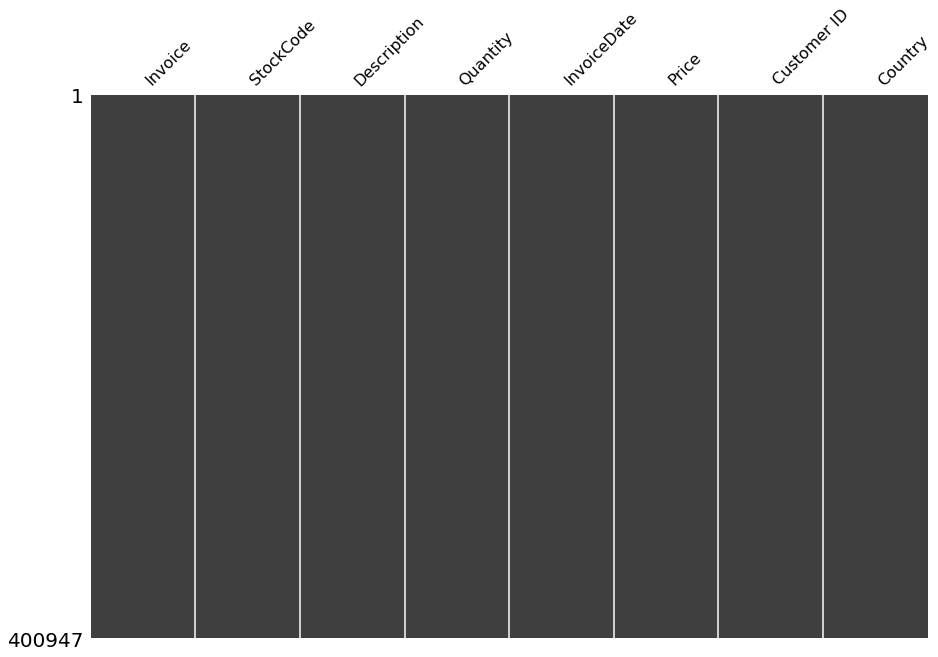

In [14]:
profile_df(df_retail_clean)

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [15]:
df_retail_clean["beneficios"]=df_retail_clean["Price"]*df_retail_clean["Quantity"]
df_groupby=df_retail_clean.groupby("Description").sum()
df_groupby.sort_values("beneficios",ascending=False,inplace=True)
df_groupby.reset_index(inplace=True)
display(df_groupby.head(30))

,Description,Quantity,Price,beneficios
0,WHITE HANGING HEART T-LIGHT HOLDER,56814,8868.69,151339.16
1,REGENCY CAKESTAND 3 TIER,12489,21080.15,143727.60
2,Manual,2569,96580.69,98531.99
3,ASSORTED COLOUR BIRD ORNAMENT,44431,2265.15,70291.03
4,JUMBO BAG RED RETROSPOT,29519,2050.35,51644.25
5,POSTAGE,2212,19964.83,48741.08
6,ROTATING SILVER ANGELS T-LIGHT HLDR,21579,638.86,40156.05
7,PAPER CHAIN KIT 50'S CHRISTMAS,13839,2372.30,36871.55
8,PARTY BUNTING,8312,3294.50,35017.30
9,EDWARDIAN PARASOL NATURAL,7201,2847.40,34044.75


In [21]:
import plotly.express as px
fig = px.bar(df_groupby.head(30), x='Description', y='beneficios')
fig.show()

In [23]:
import plotly.express as px
fig = px.bar(df_groupby.head(30), x='Description', y='Quantity')
fig.show()

¿Los artículos más vendidos son los mismos que generan más ganancias?

R: No, debido a que las ganancias están dadas por la cantidad de ventas multiplicadas por el precio del producto. Dicho esto, un artículo puede generar mayores ganancias que otro (teniendo el primero una menor cantidad de ventas) si es que su precio es lo suficientemente alto. Esto en particular se nota en la tabla del ranking de beneficios, dónde el tercer puesto está dado por un artículo que a pesar de sólo haber vendido 2000 unidades, debido a su precio elevado generó más beneficios que el producto en cuarta posición, el cual vendió 44431 unidades.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [25]:
def plot_ventas(dataframe,date_col="InvoiceDate"):
    df=dataframe.copy()
    df[date_col]=pd.to_datetime(df[date_col]).dt.date

    df_groupby=df.groupby(date_col).sum("beneficios").reset_index()
    fig = px.line(df_groupby, x=date_col, y='beneficios')
    fig.show()
    
    
plot_ventas(df_retail_clean) 

¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

R: Se observa que para ciertos días hay peaks de ingresos generados. Esto se puede deber a que quizás para esas fechas hubo rebajas o están cerca de algún día festivo. Por otro lado, se ve que las ventas entre octubre y febrero generan una mayor cantidad de beneficios. Esto se puede deber a que entre esas fechas hay una gran cantidad de eventos festivos y ofertas (Halloweeen, Black Friday, Navidad, año nuevo, etc.)

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>